Check out the Swiss Cheese rolling cadence

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plotters

In [2]:
runList = ['enigma_1189','ops2_1102', 'enigma_1260', 'enigma_1261']
runDict = {'enigma_1189':'Baseline','ops2_1102':'Cheese1', 'enigma_1260':'Cheese2', 'enigma_1261':'Cheese_no_restart'}
dbDir = '/Users/yoachim/Scratch/Opsim_sqlites/'
outDir = 'CheeseTest'
resultsDb = db.ResultsDb(outDir=outDir)
plotList = [plotters.HealpixSkyMap(), plotters.HealpixHistogram()]
summaryMetrics=[metrics.MedianMetric()]

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with constraint filter="r"
Found 544710 visits
Running:  ['opsim_Median_Inter-Night_Gap_Baseline_HEAL', 'opsim_Median_Intra-Night_Gap_Baseline_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.

/Users/yoachim/lsst/DarwinX86/anaconda/master-g68783b1848/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3758: SAWarning: Textual SQL expression 'filter="r"' should be explicitly declared as text('filter="r"') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})
Optimal bin calculation tried to make 16926 bins, returning 200



Plotting figures with filter="r" sqlconstraint now.
Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with constraint filter="r"
Found 504638 visits
Running:  ['opsim_Median_Intra-Night_Gap_Cheese1_HEAL', 'opsim_Median_Inter-Night_Gap_Cheese1_HEAL']
Completed metric generation.

Optimal bin calculation tried to make 2463 bins, returning 200
Optimal bin calculation tried to make 612 bins, returning 200



Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="r" sqlconstraint now.
Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with constraint filter="r"
Found 469113 visits
Running:  ['opsim_Median_Intra-Night_Gap_Cheese2_HEAL', 'opsim_Median_Inter-Night_Gap_Cheese2_HEAL']
Completed metric generation.

Optimal bin calculation tried to make 18512 bins, returning 200
Optimal bin calculation tried to make 1321 bins, returning 200



Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="r" sqlconstraint now.
Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with constraint filter="r"
Found 437418 visits
Running:  ['opsim_Median_Intra-Night_Gap_Cheese_no_restart_HEAL', 'opsim_Median_Inter-Night_Gap_Cheese_no_restart_HEAL']
Completed metric generation.

Optimal bin calculation tried to make 10654 bins, returning 200
Optimal bin calculation tried to make 2144 bins, returning 200



Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="r" sqlconstraint now.
Plotting complete.


Optimal bin calculation tried to make 13324 bins, returning 200


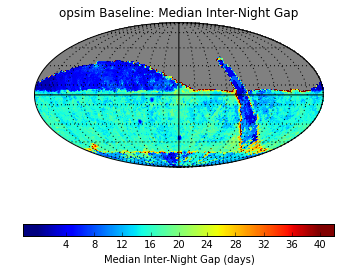

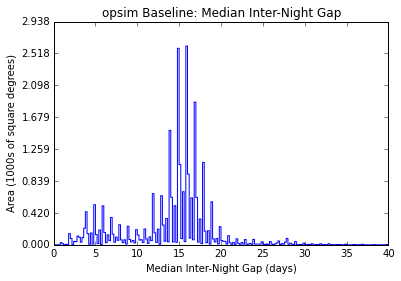

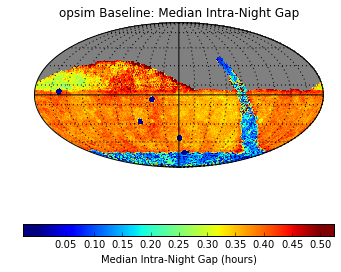

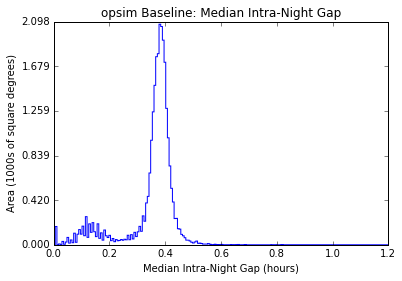

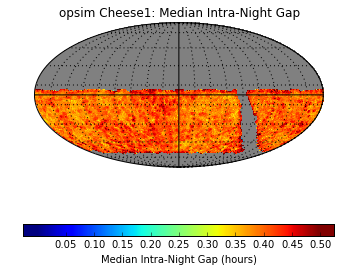

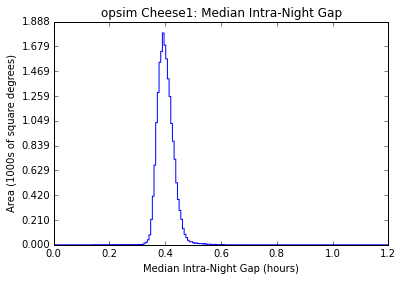

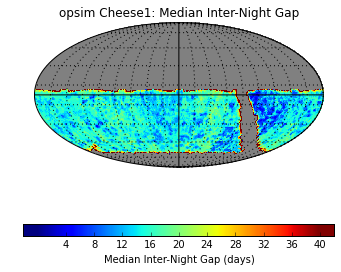

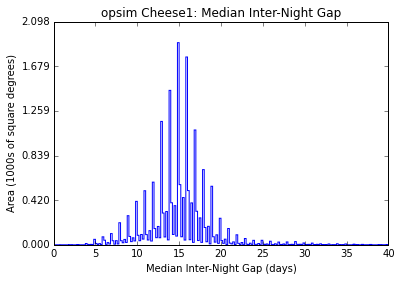

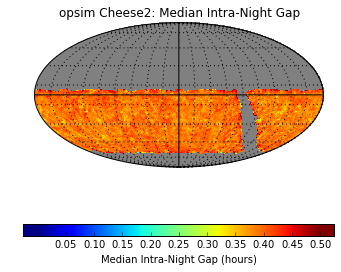

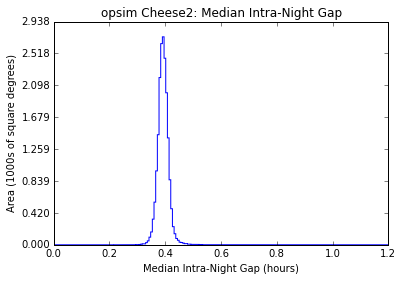

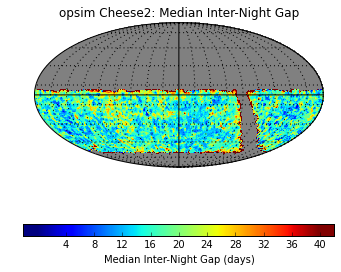

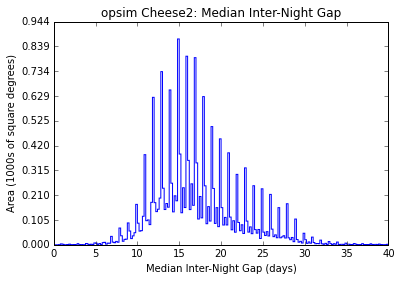

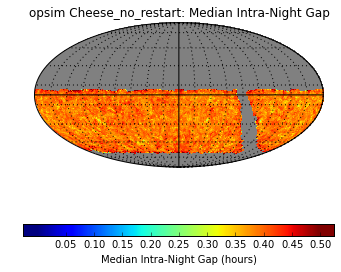

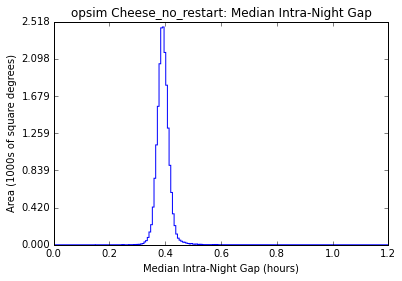

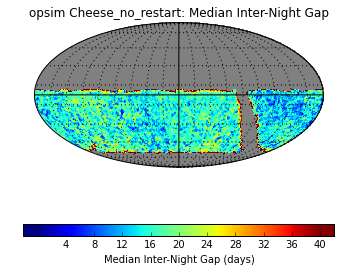

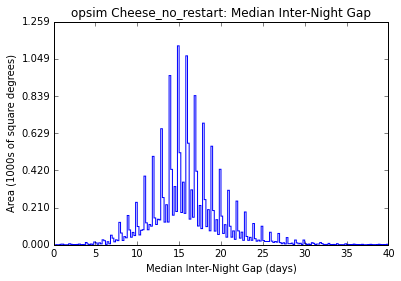

In [3]:
BLinter=[]
BLintra = []
for runName in runList:
    # Set up the database connection
    opsdb = db.OpsimDatabase(dbDir+runName+'_sqlite.db')
    md = runDict[runName]
    metric = metrics.IntraNightGapsMetric()
    metric2 = metrics.InterNightGapsMetric()
    plotDict = {'cmap':'jet', 'colorMin':0,'colorMax':0.5, 'xMin':0,'xMax':1.2}
    plotDict2 = {'cmap':'jet', 'colorMin':0,'colorMax':40, 'xMin':0,'xMax':40}
    sql = 'filter="r"'
    bundleList = []
    slicer=slicers.HealpixSlicer(lonCol='ditheredRA', latCol='ditheredDec')
    bundle = metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, 
                                        metadata=md, plotFuncs=plotList,
                                        summaryMetrics=summaryMetrics)
    bundleList.append(bundle)
    BLintra.append(bundle)
    bundle = metricBundles.MetricBundle(metric2,slicer,sql, plotDict=plotDict2, 
                                        metadata=md, plotFuncs=plotList,
                                        summaryMetrics=summaryMetrics)
    bundleList.append(bundle)
    BLinter.append(bundle)
    bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
    bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    bgroup.plotAll(closefigs=False)

In [8]:
print 'run,  median gap (days)'
for bundle in BLinter:
    print bundle.metadata, bundle.summaryValues['Median']

run,  median gap (days)
Baseline 14.984695
Cheese1 14.970151
Cheese2 16.741628
Cheese_no_restart 15.875869


In [9]:
print 'run,  median gap (hours)'
for bundle in BLintra:
    print bundle.metadata, bundle.summaryValues['Median']

run,  median gap (hours)
Baseline 0.377232000057
Cheese1 0.399167999931
Cheese2 0.392279999956
Cheese_no_restart 0.391704000067


Try out using the transient metric. Have a 20 day transient, demand it be observed 2x in the first 10 days, and also observed in at least 2 filters, using only g,r,i filters.

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database with no constraint.
Found 2469307 visits
Running:  ['opsim_SNLots_Baseline_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with  sqlconstraint now.
Plotting complete.
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database with no constraint.
Found 2320034 visits
Running:  ['opsim_SNLots_Cheese1_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with  sqlconstraint now.
Plotting complete.
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database with no constraint.
Found 2284261 visits
Running:  ['opsim_SNLots_Cheese2_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with  sqlconstraint now.
Plotting complete.
Healpix slicer usi

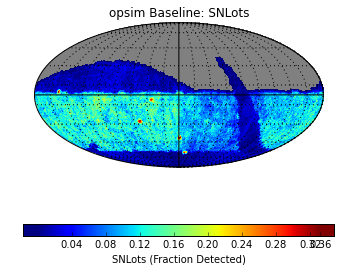

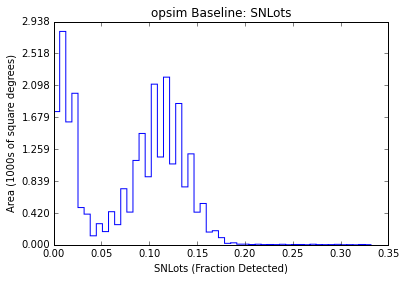

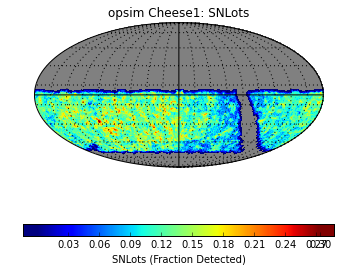

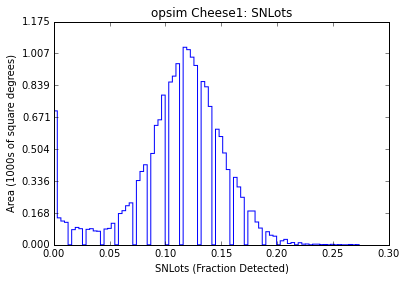

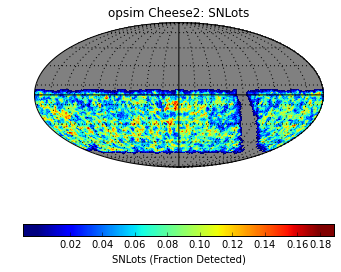

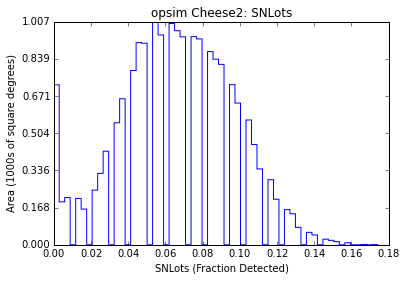

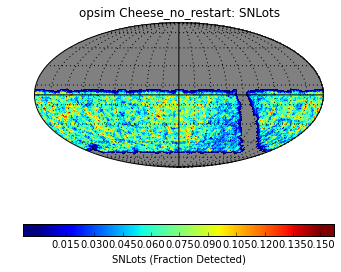

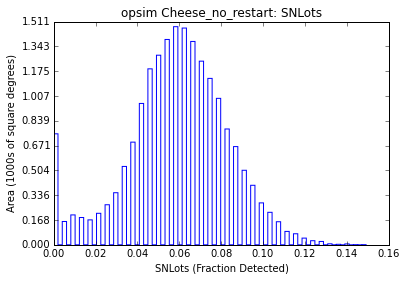

In [18]:
# Try out demanding to observations in g,r,or i
#peaks = {'uPeak':35, 'gPeak':20, 'rPeak':20, 'iPeak':20, 'zPeak':35, 'yPeak':35}
#sql = 'filter="g" or filter="r" or filter="i"'
sql = ''
allBundles = []
summaryMetrics=[metrics.SumMetric()]
peaks = {'uPeak':25.9, 'gPeak':23.6, 'rPeak':22.6, 'iPeak':22.7, 'zPeak':22.7,'yPeak':22.8}
peakTime = 15.
transDuration = peakTime+30. # Days
for runName in runList:
    # Set up the database connection
    opsdb = db.OpsimDatabase(dbDir+runName+'_sqlite.db')
    md = runDict[runName]
    #metric = metrics.TransientMetric(transDuration=20., peakTime=10., nPrePeak=2, nFilters=2, 
    #                                 nPerLC=3, **peaks)
    metric = metrics.TransientMetric(riseSlope= -2./peakTime, declineSlope=1.4/30.0,
                                     transDuration=transDuration, peakTime=peakTime,
                                     nFilters=3, nPrePeak=3, nPerLC=2,
                                     metricName='SNLots',nPhaseCheck=3,**peaks)
    bundleList = []
    plotDict = {'cmap':'jet'}
    slicer=slicers.HealpixSlicer(lonCol='ditheredRA', latCol='ditheredDec', nside=64)
    
    bundle = metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, 
                                        metadata=md, plotFuncs=plotList,
                                        summaryMetrics=summaryMetrics)
    bundleList.append(bundle)
    allBundles.append(bundle)
    bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
    bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    bgroup.plotAll(closefigs=False)

In [19]:
print 'run,  number of SN (proportional)'
for bundle in allBundles:
    print bundle.metadata, bundle.summaryValues['Sum']

run,  number of SN (proportional)
Baseline 2537.5560166
Cheese1 2551.73443983
Cheese2 1513.75103734
Cheese_no_restart 1348.97510373
